<center> <h1> 2D  Simple Harmonic Oscillator</h1> </center>

In [21]:
import numpy as np
from scipy.constants import physical_constants as pc
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import plotly
import plotly.graph_objects as go

In [22]:
amu_to_au = 1.0/(pc['kilogram-atomic mass unit relationship'][0]*pc['atomic unit of mass'][0])
            #1822.888479031408
hartree_to_cm1 = pc['hartree-hertz relationship'][0]/pc['speed of light in vacuum'][0]/100.0 
            #2.194746313705e5
sec = pc['atomic unit of time'][0]  #  2.418884326505e-17
cee = 100.0*pc['speed of light in vacuum'][0] #  2.99792458e10 cm/s
bohr_to_angstroms = pc['atomic unit of length'][0]*1e10

In [23]:
mumass = 1.0
we = 400.00   # Harmonic frequency in wavenumbers

nmu = mumass*amu_to_au
nfreq = we*sec*cee # angular harmonic frequency in au 
nkeq = ((2.0*np.pi*nfreq)**2)*nmu  # force constant in au
k = -1.0/(2.0*nmu)   # Use this if you want to change the units (don't)

In [24]:
def potential(point, k):
    x, y = point
    r = np.sqrt(x*x + y*y)
    u = 1/2 * k * (r) ** 2
    return u

def gen_V(x, u):
    """
    Assemble the matrix representation of the potential energy
    """
    V = np.zeros((NUM*NUM, NUM*NUM)).astype(np.complex)
    for m in range(NUM*NUM):
        V[m, m] = u[m]
    return(V)


def gen_T(xy, k):
    dx = xy[1][0] - xy[0][0]
    dy = xy[NUM][1] - xy[0][1]
    
    T = np.zeros((NUM*NUM, NUM*NUM)).astype(np.complex)
    row_len = int(np.sqrt(NUM*NUM))

    for m in range(0, NUM*NUM):
        for n in [m-NUM, m-1, m, m+1, m+NUM]:
            if (n >= 0 and n < NUM*NUM):
                factor = laplace_factor(m, n, row_len, dx, dy)
                T[m, n] = k * factor
    return(T)


def convert(xy, row_len):
    return xy//row_len, xy%row_len


def laplace_factor(idxy1, idxy2, row_len, dx, dy):    

    idx1, idy1 = convert(idxy1, row_len)
    idx2, idy2 = convert(idxy2, row_len)
    iddx = np.abs(idx2 - idx1) 
    iddy = np.abs(idy2 - idy1)
    
    if (iddx == 1 and iddy == 0):
        return 1 / (dx ** 2) 
    elif (iddx == 0 and iddy == 1):
        return 1 / (dy ** 2) 
    elif (iddx == 0 and iddy == 0):
        return -2 / (dy ** 2) -2 / (dx ** 2) 
    else:
        return 0


def solve_eigenproblem(H):
    """
    Solve an eigenproblem and return the eigenvalues and eigenvectors.
    """
    vals, vecs = np.linalg.eigh(H)
    idx = np.real(vals).argsort()
    vals = vals[idx]
    vecs = vecs.T[idx]
    return(vals, vecs)

In [25]:
NUM = 60
half_r = 2

x = np.linspace(-half_r, half_r, NUM)
y = np.linspace(-half_r, half_r, NUM)
x, y = np.meshgrid(x, y)
xy = np.stack((x, y), axis=-1)

xy = np.reshape(xy, (-1, 2))

In [26]:
xy.shape

(3600, 2)

In [27]:
%%time
u = np.zeros(xy.shape[0])

for i, point in enumerate(xy):
    u[i] = potential(point, nkeq)
    
V = gen_V(xy, u)

CPU times: user 96.1 ms, sys: 111 ms, total: 208 ms
Wall time: 205 ms


In [28]:
# plot potential
fig = go.Figure(data=[go.Surface(z=u.reshape(NUM, NUM))])

fig.update_layout(title='Potential Surface', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

In [29]:
%%time
T = gen_T(xy, k)

CPU times: user 151 ms, sys: 87.5 ms, total: 238 ms
Wall time: 236 ms


In [30]:
T.shape

(3600, 3600)

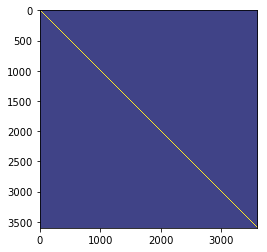

In [31]:
plt.imshow(T.real)

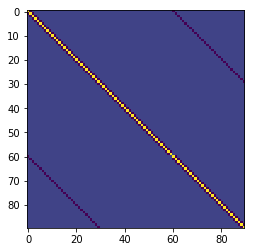

In [32]:
plt.imshow(T[:int(1.5*NUM), :int(1.5*NUM)].real)

In [33]:
%%time
H = T + V
evals, evecs = solve_eigenproblem(H)

CPU times: user 1min 12s, sys: 1.34 s, total: 1min 13s
Wall time: 7.7 s


In [34]:
evals.imag  #  Good  real eigenvalues

array([0., 0., 0., ..., 0., 0., 0.])

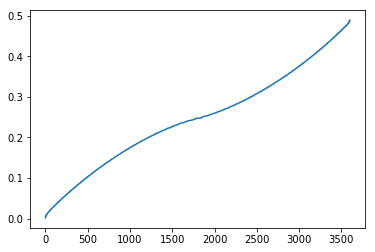

In [35]:
plt.plot(evals.real)

In [36]:
xy = xy.reshape(NUM, NUM, 2)

wave = evecs[0].reshape([NUM, NUM])

fig = go.Figure(data=[go.Surface(z=wave.real)])

fig.update_layout(title='Wavefunction', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

In [37]:
wave = evecs[1].reshape([NUM, NUM])

fig = go.Figure(data=[go.Surface(z=wave.real)])

fig.update_layout(title='Wavefunction', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

In [38]:
wave = evecs[15].reshape([NUM, NUM])

fig = go.Figure(data=[go.Surface(z=wave.real)])

fig.update_layout(title='Wavefunction', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()